In [1]:
!pip freeze

alembic==1.4.2
argon2-cffi==20.1.0
asgiref==3.2.10
astropy==4.0.1.post1
atomicwrites==1.4.0
attrs==19.3.0
azure-core==1.7.0
azure-storage-blob==12.3.2
backcall==0.2.0
bleach==3.1.5
blis==0.4.1
boto==2.49.0
boto3==1.14.38
botocore==1.17.38
catalogue==1.0.0
catboost==0.24
certifi==2020.6.20
cffi==1.14.1
chardet==3.0.4
click==7.1.2
cloudpickle==1.5.0
colorama==0.4.3
colorlover==0.3.0
combo==0.1.1
confuse==1.3.0
cryptography==3.0
cufflinks==0.17.3
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
databricks-cli==0.11.0
datefinder==0.7.1
DateTime==4.3
decorator==4.4.2
defusedxml==0.6.0
dj-database-url==0.5.0
Django==3.1
django-heroku==0.3.1
docker==4.2.2
docutils==0.15.2
entrypoints==0.3
Flask==1.1.2
funcy==1.14
future==0.18.2
gensim==3.8.3
gitdb==4.0.5
GitPython==3.1.7
gorilla==0.3.0
graphviz==0.14.1
gunicorn==20.0.4
htmlmin==0.1.12
idna==2.10
ImageHash==4.1.0
imbalanced-learn==0.7.0
importlib-metadata==1.7.0
iniconfig==1.0.1
ipykernel==5.3.4
ipython==7.17.0
ipython-genutils==0.2.0
ipywidgets==7

In [55]:

import pandas as pd
from datetime import datetime
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as snb
import pickle


In [56]:
df = pd.read_csv('ipl.csv')

In [57]:
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [58]:
df.shape

(76014, 15)

# Data Cleaning

In [59]:
cols_removed = ['mid', 'batsman', 'bowler','striker', 'non-striker' ]
df.drop(labels = cols_removed, axis = 1, inplace = True)

In [60]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [61]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [62]:
# Renameing DC to SRH
df['bat_team'] = df['bat_team'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
df['bowl_team'] = df['bowl_team'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
# Renameing DD to DC(Delhi Capitals)
df['bat_team'] = df['bat_team'].replace(['Delhi Daredevils'],'Delhi Capitals')
df['bowl_team'] = df['bowl_team'].replace(['Delhi Daredevils'],'Delhi Capitals')

In [63]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [64]:
#Using only the curretly playing teams
teams_playing = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals']

df = df[(df['bat_team'].isin(teams_playing) & df['bowl_team'].isin(teams_playing))]

In [65]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [66]:
df = df[df['overs'] >= 5.0]

In [67]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [68]:
df.dtypes

date               object
venue              object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [69]:
#Date converted to datetime object for easy processing
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [70]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [71]:
venue_freq_map = df['venue'].value_counts().to_dict()
venue_freq_map['Brabourne Stadium'] = 1025

In [72]:
venue_freq_map

{'Eden Gardens': 4770,
 'M Chinnaswamy Stadium': 4681,
 'Feroz Shah Kotla': 4636,
 'Wankhede Stadium': 4435,
 'MA Chidambaram Stadium, Chepauk': 4110,
 'Rajiv Gandhi International Stadium, Uppal': 3803,
 'Punjab Cricket Association Stadium, Mohali': 2893,
 'Sawai Mansingh Stadium': 2698,
 'Kingsmead': 1291,
 'Sardar Patel Stadium, Motera': 1110,
 'SuperSport Park': 1024,
 'Brabourne Stadium': 1025,
 'Dr DY Patil Sports Academy': 901,
 'Himachal Pradesh Cricket Association Stadium': 831,
 'New Wanderers Stadium': 741,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 727,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 651,
 'Dubai International Cricket Stadium': 649,
 "St George's Park": 645,
 'Sheikh Zayed Stadium': 611,
 'Sharjah Cricket Stadium': 559,
 'Newlands': 554,
 'Barabati Stadium': 545,
 'JSCA International Stadium Complex': 534,
 'Shaheed Veer Narayan Singh International Stadium': 459,
 'Maharashtra Cricket Association Stadium': 379,
 'Buffalo Park': 280,
 'V

In [73]:
df['venue'] = df['venue'].map(venue_freq_map)

In [74]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,4681,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,4681,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,4681,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,4681,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,4681,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Data Processing


In [75]:
#One hot encoding

HotDf = pd.get_dummies(data = df, columns = ['bat_team', 'bowl_team'])

In [76]:
HotDf.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Capitals', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Capitals', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [77]:
HotDf = HotDf[['date', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Capitals', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Capitals', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total']]

# Splitting DS into train and test

In [78]:
X_train = HotDf.drop(labels = 'total', axis = 1)[HotDf['date'].dt.year<=2016]
X_test = HotDf.drop(labels = 'total', axis = 1)[HotDf['date'].dt.year>=2017]

Y_train = HotDf[HotDf['date'].dt.year<=2016]['total'].values
Y_test = HotDf[HotDf['date'].dt.year>=2017]['total'].values

In [79]:
Y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [80]:
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [81]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,4681,61,0,5.1,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,4681,61,1,5.2,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,4681,61,1,5.3,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,4681,61,1,5.4,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,4681,61,1,5.5,58,1


In [82]:
arr = X_test.to_numpy()
arr[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.803e+03, 4.600e+01,
       1.000e+00, 5.100e+00, 4.200e+01, 1.000e+00])

# Training Model

In [83]:
#Linear Regression
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

# Prediction
predLinear = LinReg.predict(X_test)

In [84]:
print('MAE:', metrics.mean_absolute_error(Y_test, predLinear))
print('MSE:', metrics.mean_squared_error(Y_test, predLinear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predLinear)))

MAE: 12.443430284744888
MSE: 259.573120412942
RMSE: 16.11127308479817


# Checking Model accuracy

In [86]:
thresh = 20
tot = len(predLinear)
count = 0
for i in range(len(predLinear)):
    if abs(predLinear[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

80.81353491720662


In [87]:
# Ridge Regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35, 40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75209e-23): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.60574e-24): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.65627e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.93133e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.63505e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.62616e-22): result may n

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [88]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-314.0682687736865


In [89]:
#Prediction

prediction = ridge_regressor.predict(X_test)


<AxesSubplot:>

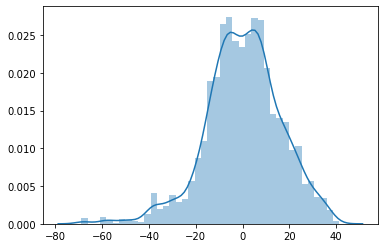

In [90]:
snb.distplot(Y_test - prediction)

In [91]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 12.441184602163139
MSE: 259.56146744658093
RMSE: 16.110911440591465


# Checking ridge model accuracy

In [92]:
thresh = 20
tot = len(prediction)
count = 0
for i in range(len(prediction)):
    if abs(prediction[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

80.77753779697623


In [37]:
# rf = RandomForestRegressor(n_estimators = 150, random_state = 0) 
# rf.fit(X_train, Y_train)

In [38]:
# predRF = rf.predict(X_test)

In [39]:
# print('MAE:', metrics.mean_absolute_error(Y_test, predRF))
# print('MSE:', metrics.mean_squared_error(Y_test, predRF))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predRF)))

In [40]:
# snb.distplot(Y_test - predRF)

# Pickle File

In [41]:
fileName = 'models/linearRegModel.pkl'
pickle.dump(LinReg, open(fileName, 'wb'))

fileName = 'models/ridgeRegModel.pkl'
pickle.dump(ridge_regressor, open(fileName, 'wb'))

# fileName = 'models/RF_RegModel.pkl'
# pickle.dump(rf, open(fileName, 'wb'))

In [93]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75209e-23): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.60574e-24): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.65627e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.93133e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.63505e-22): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.62616e-22): result may n

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [94]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
ridge_regressor.error_score

{'alpha': 40}
-314.0682687736865


nan

In [95]:
thresh = 20
tot = len(prediction)
count = 0
for i in range(len(prediction)):
    if abs(prediction[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

80.77753779697623


In [44]:
prediction = ridge_regressor.predict(X_test)

<AxesSubplot:>

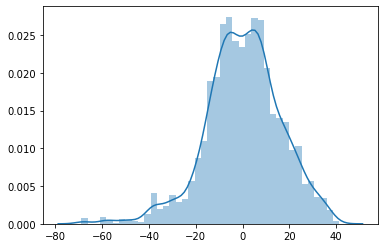

In [45]:
snb.distplot(Y_test - prediction)

In [46]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 12.441184602163139
MSE: 259.56146744658093
RMSE: 16.110911440591465


In [47]:
d = {'pred': prediction, 'actual': Y_test}
predAct = pd.DataFrame(data = d)

In [48]:
predAct

,pred,actual
0,169.986327,207
1,172.958732,207
2,172.454305,207
3,175.426710,207
4,178.469771,207
...,...,...
2773,102.520397,107
2774,102.849849,107
2775,102.274765,107
2776,101.911651,107


In [49]:
df.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,2017-05-19,4681,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,4681,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,4681,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,4681,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,2017-05-19,4681,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [58]:
predAct['pref+5'] = predAct['pred'] + 5
predAct['pref-5'] = predAct['pred'] - 5

In [59]:
predAct

,pred,actual,pref+5,pref-5
0,169.986327,207,174.986327,164.986327
1,172.958732,207,177.958732,167.958732
2,172.454305,207,177.454305,167.454305
3,175.426710,207,180.426710,170.426710
4,178.469771,207,183.469771,173.469771
...,...,...,...,...
2773,102.520397,107,107.520397,97.520397
2774,102.849849,107,107.849849,97.849849
2775,102.274765,107,107.274765,97.274765
2776,101.911651,107,106.911651,96.911651


# Another approach

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(HotDf, test_size=0.2)

In [32]:
test.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total
73373,2017-05-01,0,0,0,0,0,0,1,0,0,...,0,0,0,4435,74,2,8.3,43,1,162
9921,2009-05-04,1,0,0,0,0,0,0,0,0,...,0,0,1,280,110,2,13.5,32,1,178
67126,2016-05-13,0,0,0,0,1,0,0,0,0,...,0,0,0,651,117,9,19.1,53,4,124
32767,2012-04-21,0,0,0,0,0,1,0,0,1,...,0,0,0,4110,50,2,8.2,23,2,146
50152,2014-04-28,0,0,0,0,0,0,1,0,0,...,0,0,0,649,105,7,16.5,26,2,124


In [33]:
X_train = train.drop(columns = 'total', axis = 1)
X_test = test.drop(columns = 'total', axis = 1)

Y_train = train['total'].values
Y_test = test['total'].values

In [34]:
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [35]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue,runs,wickets,overs,runs_last_5,wickets_last_5
74988,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,4435,124,1,9.4,65,1
4697,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,4636,53,1,6.2,45,0
24816,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,4636,90,3,12.2,36,1
24853,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,4636,128,5,17.6,35,2
23193,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,4636,94,1,10.3,57,0


In [36]:
Y_train

array([230, 194, 148, ..., 139, 168, 111], dtype=int64)

In [43]:
# Ridge Regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35, 40, 100, 200, 300, 1000, 5000]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.9161e-24): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.04763e-23): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.19424e-21): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22318e-21): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14546e-21): result may not be accurate.
  overwrite_a=True).T
f:\newipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.16919e-21): result may no

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 100, 200, 300, 1000, 5000]},
             scoring='neg_mean_squared_error')

In [44]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-297.33740918134356


In [45]:
prediction = ridge_regressor.predict(X_test)

<AxesSubplot:>

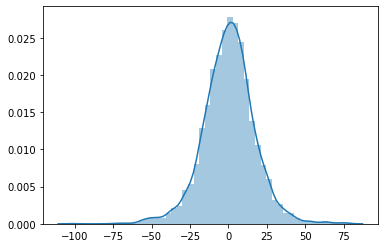

In [46]:
snb.distplot(Y_test - prediction)

In [48]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 12.674895172201959
MSE: 283.90201328354726
RMSE: 16.849392074598633


In [54]:
thresh = 20
tot = len(prediction)
count = 0
for i in range(len(prediction)):
    if abs(prediction[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

80.6701030927835


In [96]:
#Linear Regression
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

# Prediction
predLinear = LinReg.predict(X_test)

In [102]:
thresh = 20
tot = len(predLinear)
count = 0
for i in range(len(predLinear)):
    if abs(predLinear[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

80.81353491720662


# Training the entire DS on LR model

In [105]:
X = HotDf.drop(columns = ['total', 'date'], axis = 1)

In [106]:
Y = HotDf['total'].values
Y

array([222, 222, 222, ..., 107, 107, 107], dtype=int64)

In [108]:
#Linear Regression


LinReg = LinearRegression()
LinReg.fit(X, Y)


LinearRegression()

In [109]:
predLinear = LinReg.predict(X_test)

In [110]:
thresh = 20
tot = len(predLinear)
count = 0
for i in range(len(predLinear)):
    if abs(predLinear[i] - Y_test[i]) <= thresh:
        count+=1
print((count/tot)*100)

81.28149748020158


In [111]:
fileName = 'models/linearRegModel.pkl'
pickle.dump(LinReg, open(fileName, 'wb'))